# Length normalization

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data and computing min, max and avg of lengths

test_lengths = []
train_lengths = []

for file in os.listdir(os.path.join('data', 'train')):
    f = open(os.path.join('data', 'train', file), 'r')
    content = f.read().split()
    train_lengths.append(len(content))

for file in os.listdir(os.path.join('data', 'test')):
    f = open(os.path.join('data', 'test', file), 'r')
    content = f.read().split()
    test_lengths.append(len(content))
train_min = min(train_lengths)
train_max = max(train_lengths)
train_avg = np.mean(train_lengths)

test_min = min(test_lengths)
test_max = max(test_lengths)
test_avg = np.mean(test_lengths)


In [3]:
print("--- TRAIN ---")
print(f"Min: {train_min}\nMax: {train_max}\nAverage: {train_avg}\n")

print("--- TEST ---")
print(f"Min: {test_min}\nMax: {test_max}\nAverage: {test_avg}\n")

--- TRAIN ---
Min: 145
Max: 153
Average: 149.876

--- TEST ---
Min: 146
Max: 153
Average: 149.9


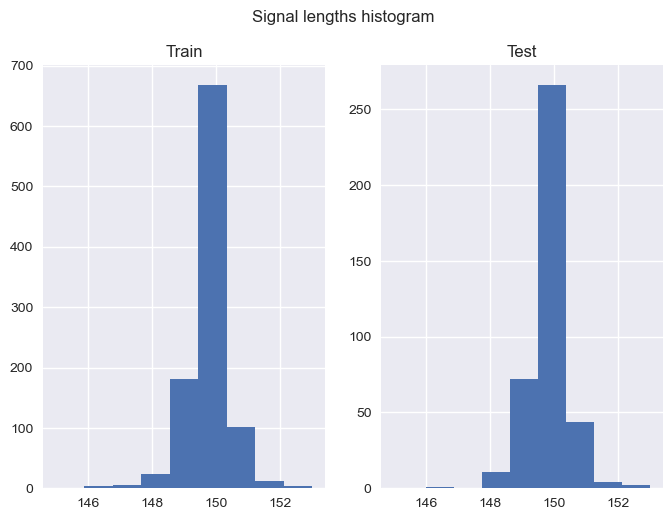

In [15]:
# histograms of lengths

plt.style.use('seaborn-v0_8')

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.hist(train_lengths, bins = train_max-train_min+1)
ax1.set_title('Train')
ax2.hist(test_lengths, bins = test_max-test_min+1)
ax2.set_title('Test')
fig.suptitle('Signal lengths histogram')

# plt.savefig('length_histograms.png')
plt.show()

In [5]:
# function to copy the data and normalize the data by slicing it at a point or adding trailing 0s

def normalize_data_length(length, method='shorten'):
    
    test_train = ['train', 'test']
    
    for main in ['data_long', 'data_short']:
        os.makedirs(main, exist_ok=True)
        for sub in test_train:
            os.makedirs(os.path.join(main, sub), exist_ok=True)
    
    for group in test_train:
        for file_name in os.listdir(os.path.join('data', group)):
            from_file = open(os.path.join('data', group, file_name), 'r')
            to_file = None
            content = from_file.read().split()
            
            if method == 'shorten':
                content = content[:length]
                to_file = open(os.path.join('data_short', group, file_name), 'w')
            elif method == 'lengthen':
                content.extend(['0,0,0'] * (length - len(content)))
                to_file = open(os.path.join('data_long', group, file_name), 'w')
            for line in content:
                to_file.write(line + '\n')
    
    

In [6]:
normalize_data_length(145, 'shorten')
normalize_data_length(153, 'lengthen')